Gender and Age Differences in Weight Change Patterns

In [22]:
import pandas as pd

#Loading the Dataset
df = pd.read_csv('weight_change_dataset.csv')
orig_df = df

#Printing the Dataset
print(df)

    Participant ID  Age Gender  Current Weight (lbs)  BMR (Calories)  \
0                1   56      M                 228.4          3102.3   
1                2   46      F                 165.4          2275.5   
2                3   32      F                 142.8          2119.4   
3                4   25      F                 145.5          2181.3   
4                5   38      M                 155.5          2463.8   
..             ...  ...    ...                   ...             ...   
95              96   59      M                 181.9          2622.8   
96              97   56      F                 116.5          1736.5   
97              98   58      F                 162.7          2188.6   
98              99   45      M                 179.8          2671.9   
99             100   24      M                 185.2          2830.7   

    Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0                    3916.0                          813.7   
1          

In [23]:
#Data type of each column
df.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [24]:
#Checking rows (samples) and columns (features) of the dataset
df.shape

(100, 13)

In [25]:
#Exploring the dataset

#Exploring with statistics
df.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


In [26]:
# Trying to view 5 column
df.describe().iloc[:,:5]

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000
std,29.011492,12.219454,30.333856,364.431221,513.313097
min,1.000000,18.000000,100.000000,1566.500000,2030.900000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000


In [27]:
#Cleaning the Dataset

#Checking for missing values
print("Missing values:")
print(df.isna().sum())

Missing values:
Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64


In [28]:
#Creating boolean array to indicate if a row has a missing data by presenting it with True or False
mask = df.isnull()

# For rows
mask.head()


,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
mask = df.isnull().any(axis=1)

In [30]:
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [31]:
#check Age column
df[mask].Age.head()

Series([], Name: Age, dtype: int64)

In [32]:
# Using this method to count the values of the Gender (male and female)
df.Gender.value_counts(dropna=False)

Gender
M    57
F    43
Name: count, dtype: int64

In [33]:
# Trying the same method for Sleep quality (exellent, good, fair, poor)
df['Sleep Quality'].value_counts(dropna=False)


Sleep Quality
Poor         38
Fair         24
Good         22
Excellent    16
Name: count, dtype: int64

In [34]:
# Lastly, trying the same method for Age
df.Age.value_counts(dropna=False)

Age
41    6
25    5
32    4
56    4
24    4
42    4
19    4
38    4
31    4
52    3
28    3
46    3
26    3
45    3
59    3
57    3
53    3
35    3
43    3
21    3
18    2
40    2
33    2
20    2
39    2
58    2
50    2
34    2
36    1
47    1
29    1
55    1
54    1
44    1
37    1
23    1
27    1
51    1
48    1
22    1
Name: count, dtype: int64

In [35]:
# Displaying the Current Weight (lbs)
print(df['Current Weight (lbs)'])

0     228.4
1     165.4
2     142.8
3     145.5
4     155.5
      ...  
95    181.9
96    116.5
97    162.7
98    179.8
99    185.2
Name: Current Weight (lbs), Length: 100, dtype: float64


In [36]:
#Checking missing values in Current Weight (lbs)
print("NaN values in 'Current Weight (lbs)' column:")
print(df['Current Weight (lbs)'].isna().sum())

NaN values in 'Current Weight (lbs)' column:
0


In [37]:
#Handling outliers in 'Current Weight (lbs)'
acceptable_weight = (df['Current Weight (lbs)'] >= 50) & (df['Current Weight (lbs)'] <= 400)
df = df[acceptable_weight]

In [38]:
df['Age'] = df['Age'].astype(int)
df['Current Weight (lbs)'] = df['Current Weight (lbs)'].astype(float)
df['BMR (Calories)'] = df['BMR (Calories)'].astype(float)

In [39]:
print("Missing values after cleaning:")
print(df.isna().sum())
print("Dataset information:")
print(df.info())
print("Dataset statistics:")
print(df.describe())

Missing values after cleaning:
Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calori

In [40]:
#Visualising
import matplotlib.pyplot as plt
import seaborn as sns

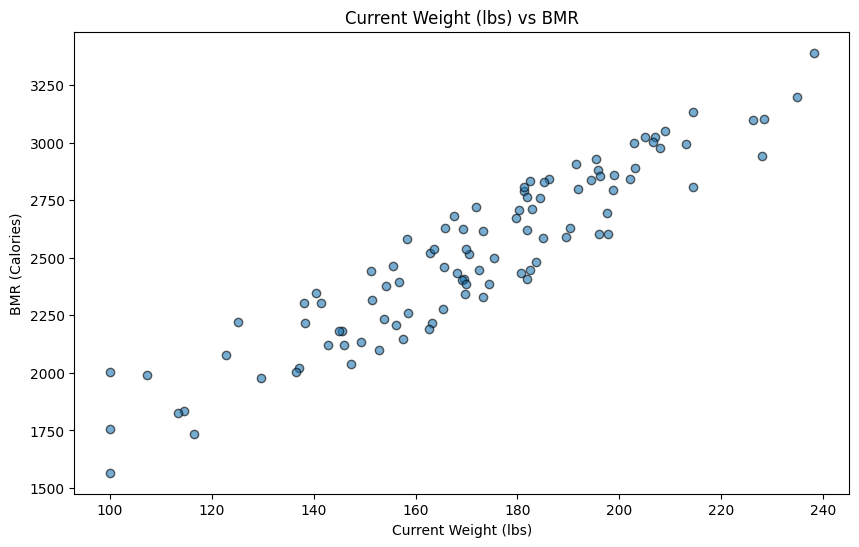

In [41]:
#Ploting Current Weight vs BMR
plt.figure(figsize=(10, 6))
plt.scatter(df['Current Weight (lbs)'], df['BMR (Calories)'], alpha=0.6, edgecolors='k')
plt.title('Current Weight (lbs) vs BMR')
plt.xlabel('Current Weight (lbs)')
plt.ylabel('BMR (Calories)')
plt.show()

In [42]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [43]:
#Preparing data
X = df[['Current Weight (lbs)', 'Age', 'Daily Calories Consumed']]
y = df['BMR (Calories)']

In [44]:
if 'Gender' in df.columns:
    encoder = LabelEncoder()
    df['Gender'] = encoder.fit_transform(df['Gender'])
    X = df[['Current Weight (lbs)', 'Age', 'Daily Calories Consumed', 'Gender']]


In [45]:
#Splitting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
#checking the target y_train
print(y_train)

55    2587.0
88    3048.9
26    2797.1
42    2712.2
69    2023.3
       ...  
60    2616.4
71    2120.5
14    2432.2
92    2537.3
51    2377.0
Name: BMR (Calories), Length: 80, dtype: float64


In [47]:
#checking the samples X_train
print(X_train)

    Current Weight (lbs)  Age  Daily Calories Consumed  Gender
55                 185.0   23                   3327.8       0
88                 209.0   28                   4000.0       1
26                 191.8   44                   4000.0       1
42                 182.8   43                   4000.0       1
69                 137.2   40                   3827.8       0
..                   ...  ...                      ...     ...
60                 173.3   43                   4000.0       1
71                 145.9   38                   3734.5       0
14                 168.1   20                   3885.8       0
92                 169.9   52                   3269.5       1
51                 154.3   53                   3544.5       1

[80 rows x 4 columns]


In [49]:
#Using the ML algorithm
#Here using LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
#Making predictions
y_pred = model.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.2650289429403074
Mean Squared Error (MSE): 0.0968588906266629
R² Score: 0.9999994514726834


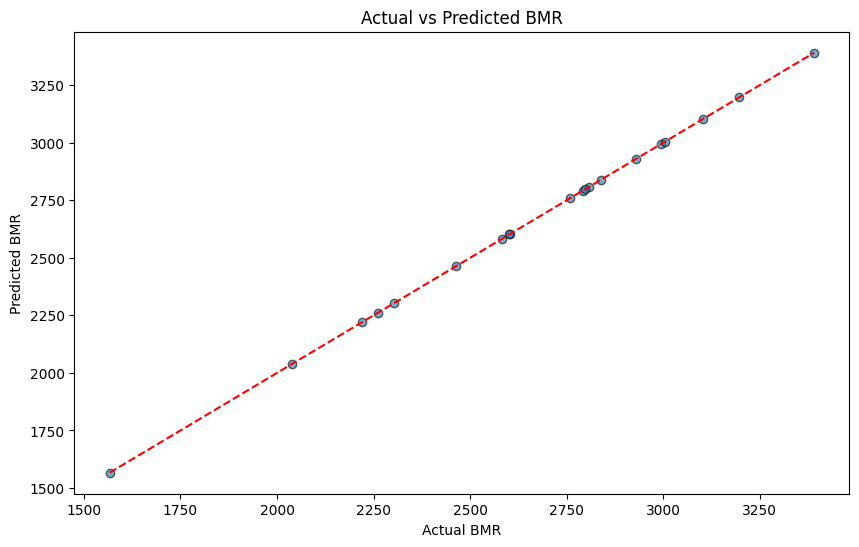

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line for perfect prediction
plt.xlabel('Actual BMR')
plt.ylabel('Predicted BMR')
plt.title('Actual vs Predicted BMR')
plt.show()

In [56]:
#Using Confusion Matrix 
from sklearn.metrics import confusion_matrix, classification_report

# Convertinh predictions to categories ( High BMR, Low BMR)
# Using median as a threshold for High/Low BMR
threshold = y.median()  
y_test_class = ['High' if bmr > threshold else 'Low' for bmr in y_test]
y_pred_class = ['High' if pred > threshold else 'Low' for pred in y_pred]

#Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

#Showing classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


Confusion Matrix:
[[14  0]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

